In [18]:
import pandas, numpy

In [29]:
import scipy, scipy.signal

In [32]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

In [2]:
input_file = '230117_Arnar.lfq.proteins_From_Gudrun.xlsx'

In [3]:
df = pandas.read_excel(input_file)

In [4]:
df.columns

Index(['Protein Group', 'Top', 'Accession', 'Significance', 'Coverage (%)',
       '#Peptides', '#Unique', 'PTM', 'ADRNOR_4H_1_1_2792 Area',
       'ADRNOR_4H_1_2_2793 Area', 'ADRNOR_4H_2_1_2795 Area',
       'ADRNOR_4H_2_2_2796 Area', 'ADRNOR_4H_3_1_2798 Area',
       'ADRNOR_4H_3_2_2799 Area', 'ADR_4H_1_1_2772 Area',
       'ADR_4H_1_2_2773 Area', 'ADR_4H_2_1_2775 Area', 'ADR_4H_2_2_2776 Area',
       'ADR_4H_3_1_2778 Area', 'ADR_4H_3_2_2779 Area', 'CTRL_4H_1_1_2752 Area',
       'CTRL_4H_1_2_2753 Area', 'CTRL_4H_2_1_2755 Area',
       'CTRL_4H_2_2_2756 Area', 'CTRL_4H_3_1_2758 Area',
       'CTRL_4H_3_2_2759 Area', 'NOR_4H_1_1_2781 Area', 'NOR_4H_1_2_2782 Area',
       'NOR_4H_2_1_2786 Area', 'NOR_4H_2_2_2787 Area', 'NOR_4H_3_1_2789 Area',
       'NOR_4H_3_2_2790 Area', 'TNF_4H_1_1_2761 Area', 'TNF_4H_1_2_2762 Area',
       'TNF_4H_2_1_2764 Area', 'TNF_4H_2_2_2765 Area', 'TNF_4H_3_1+_2769 Area',
       'TNF_4H_3_2_2770 Area', 'ADRNOR_24H_1_1_2931 Area',
       'ADRNOR_24H_1_2_2932 A

In [5]:
subset = []
for element in df.columns:
    if 'ADRNOR_4H_' in element:
        subset.append(element)
    if 'CTRL_4H_' in element:
        subset.append(element)

print(len(subset), subset)
useful_info = ['Accession'] + subset
wdf = df.loc[:, useful_info]
wdf.set_index('Accession', inplace=True)

print(wdf.columns)
labels01 = wdf.columns.values[[0, 1]]
labels02 = wdf.columns.values[[2, 3]]
labels03 = wdf.columns.values[[4, 5]]

labels04 = wdf.columns.values[[6, 7]]
labels05 = wdf.columns.values[[8, 9]]
labels06 = wdf.columns.values[[10, 11]]

wdf.insert(0, 'c3', wdf.loc[:, labels06].median(axis=1))
wdf.insert(0, 'c2', wdf.loc[:, labels05].median(axis=1))
wdf.insert(0, 'c1', wdf.loc[:, labels04].median(axis=1))

wdf.insert(0, 'a3', wdf.loc[:, labels03].median(axis=1))
wdf.insert(0, 'a2', wdf.loc[:, labels02].median(axis=1))
wdf.insert(0, 'a1', wdf.loc[:, labels01].median(axis=1))

#print(wdf.shape)
wdf.head()

12 ['ADRNOR_4H_1_1_2792 Area', 'ADRNOR_4H_1_2_2793 Area', 'ADRNOR_4H_2_1_2795 Area', 'ADRNOR_4H_2_2_2796 Area', 'ADRNOR_4H_3_1_2798 Area', 'ADRNOR_4H_3_2_2799 Area', 'CTRL_4H_1_1_2752 Area', 'CTRL_4H_1_2_2753 Area', 'CTRL_4H_2_1_2755 Area', 'CTRL_4H_2_2_2756 Area', 'CTRL_4H_3_1_2758 Area', 'CTRL_4H_3_2_2759 Area']
Index(['ADRNOR_4H_1_1_2792 Area', 'ADRNOR_4H_1_2_2793 Area',
       'ADRNOR_4H_2_1_2795 Area', 'ADRNOR_4H_2_2_2796 Area',
       'ADRNOR_4H_3_1_2798 Area', 'ADRNOR_4H_3_2_2799 Area',
       'CTRL_4H_1_1_2752 Area', 'CTRL_4H_1_2_2753 Area',
       'CTRL_4H_2_1_2755 Area', 'CTRL_4H_2_2_2756 Area',
       'CTRL_4H_3_1_2758 Area', 'CTRL_4H_3_2_2759 Area'],
      dtype='object')


,a1,a2,a3,c1,c2,c3,ADRNOR_4H_1_1_2792 Area,ADRNOR_4H_1_2_2793 Area,ADRNOR_4H_2_1_2795 Area,ADRNOR_4H_2_2_2796 Area,ADRNOR_4H_3_1_2798 Area,ADRNOR_4H_3_2_2799 Area,CTRL_4H_1_1_2752 Area,CTRL_4H_1_2_2753 Area,CTRL_4H_2_1_2755 Area,CTRL_4H_2_2_2756 Area,CTRL_4H_3_1_2758 Area,CTRL_4H_3_2_2759 Area
Accession,,,,,,,,,,,,,,,,,,
Q01105|SET_HUMAN,65495.316500,85802.715000,107049.96800,74730.06000,58426.502000,79745.793000,66207.93000,64782.70300,86486.8400,85118.59000,109897.17000,104202.7660,76131.59000,73328.5300,52312.2270,64540.77700,81183.08600,78308.50000
P30520|PURA2_HUMAN,37783.377000,45287.551000,71625.20500,60713.17700,49429.075000,51736.767500,37504.72700,38062.02700,46083.1760,44491.92600,75813.75000,67436.6600,58889.98400,62536.3700,50495.8700,48362.28000,51730.57000,51742.96500
H3BSJ5|H3BSJ5_HUMAN,1248.864050,1276.184400,665.27760,1023.67045,1008.338200,586.370725,710.18670,1787.54140,1401.3933,1150.97550,738.94460,591.6106,994.67620,1052.6647,1322.4603,694.21610,583.13250,589.60895
Q92900|RENT1_HUMAN,54415.652000,58750.342500,9318.80320,54141.58050,35658.565000,56442.270000,50964.09400,57867.21000,57027.4900,60473.19500,5592.36040,13045.2460,61990.89500,46292.2660,33900.8500,37416.28000,55339.03000,57545.51000
B7ZBQ3|B7ZBQ3_HUMAN,343.877655,487.092185,919.51117,280.56381,314.254565,353.206300,328.46777,359.28754,479.5121,494.67227,956.61804,882.4043,300.37222,260.7554,288.9870,339.52213,371.89246,334.52014


In [16]:
treatment = wdf.loc[:, ['a1', 'a2', 'a3']].mean(axis=1)
reference = wdf.loc[:, ['c1', 'c2', 'c3']].mean(axis=1)

Accession
H0YC82|H0YC82_HUMAN      0.000000
Q7Z406|MYH14_HUMAN       0.000000
O60828|PQBP1_HUMAN       0.000000
P57737|CORO7_HUMAN       0.000000
Q9UI12|VATH_HUMAN        0.000000
                          ...    
Q9Y6K8|KAD5_HUMAN      188.441323
Q9H5X1|CIA2A_HUMAN     188.930728
H0YKV4|H0YKV4_HUMAN    188.930728
Q99878|H2A1J_HUMAN     201.081449
Q5W0Z9|ZDH20_HUMAN     204.128202
Length: 100, dtype: float64


In [40]:
import scipy.optimize

0.0 19.896526978121827 [16.11489021 15.71962073  9.77114794 ... 10.21311062 10.53081138
 16.26949428]
7841 7841
[3.35346693e-09 8.97719235e-09 1.83293958e-08 3.37522069e-08
 5.89738220e-08 9.98755829e-08 1.65652100e-07 2.70548239e-07
 4.36433532e-07 6.96578859e-07 1.10113978e-06 1.72503490e-06
 2.67914612e-06 4.12607164e-06 6.30204268e-06 9.54708077e-06
 1.43460310e-05 2.13837586e-05 3.16185364e-05 4.63784609e-05
 6.74865840e-05 9.74212802e-05 1.39519124e-04 1.98228113e-04
 2.79419341e-04 3.90765024e-04 5.42189963e-04 7.46401933e-04
 1.01950384e-03 1.38168682e-03 1.85799835e-03 2.47917326e-03
 3.28250788e-03 4.31274885e-03 5.62295884e-03 7.27531153e-03
 9.34175894e-03 1.19045059e-02 1.50562202e-02 1.88999046e-02
 2.35483566e-02 2.91231497e-02 3.57530792e-02 4.35720360e-02
 5.27162943e-02 6.33212268e-02 7.55174986e-02 8.94268230e-02
 1.05157403e-01 1.22799215e-01 1.42419324e-01 1.64057437e-01
 1.87721925e-01 2.13386531e-01 2.40987978e-01 2.70424660e-01
 3.01556560e-01 3.34206481e-01 3.6

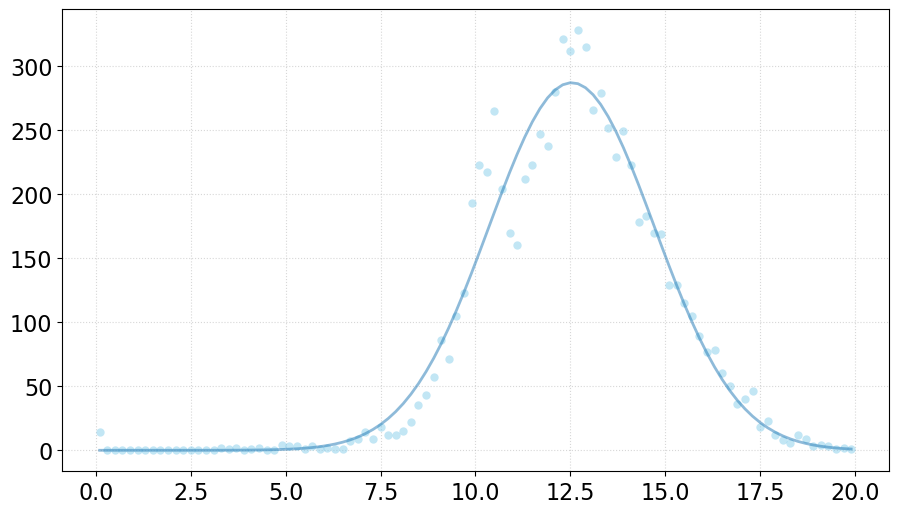

In [55]:
intensity = numpy.log2(reference.values + 1)
print(numpy.min(intensity), numpy.max(intensity), intensity)

hist, bin_edges = numpy.histogram(intensity, bins=100, range=(0, 20))
print(sum(hist), len(intensity))
half_bin = (bin_edges[1] - bin_edges[0])/2
x = bin_edges + half_bin
x = x[:-1]




#yhat = scipy.signal.savgol_filter(hist, 51, 3)


def func(x, a, x0, sigma): 
    return a*numpy.exp(-(x-x0)**2/(2*sigma**2)) 

popt, pcov  = scipy.optimize.curve_fit(func, x, hist)
yhat = func(x, popt[0], popt[1], popt[2]) 
cdf = numpy.cumsum(yhat)/numpy.sum(yhat)
print(cdf)

matplotlib.pyplot.plot(x, hist, 'o', color='skyblue', alpha=1/2, mec='none')
matplotlib.pyplot.plot(x, yhat, '-', lw=2, alpha=1/2)

matplotlib.pyplot.grid(ls=':', alpha=1/2)
matplotlib.pyplot.show()


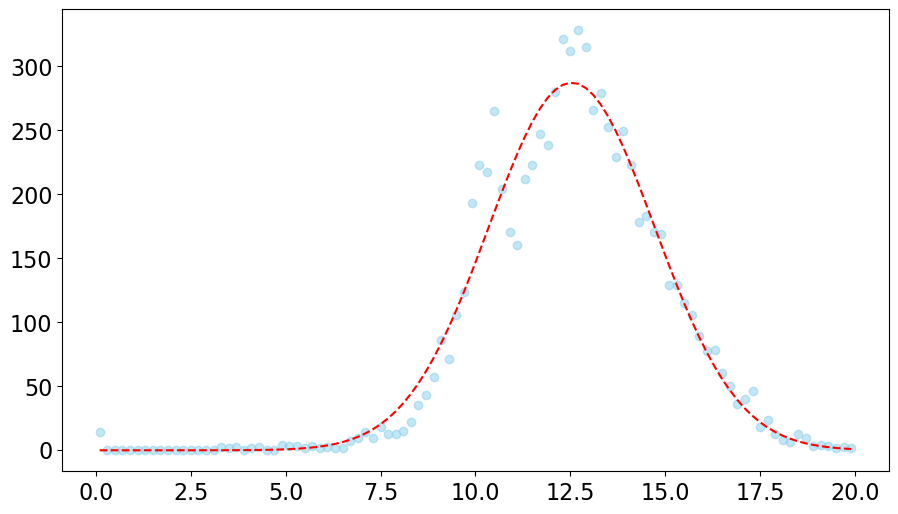

In [49]:
def gauss(x, H, A, x0, sigma):
    return H + A * numpy.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    sigma = numpy.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = scipy.optimize.curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma])
    return popt

xdata = x
ydata = hist

H, A, x0, sigma = gauss_fit(xdata, ydata)
matplotlib.pyplot.plot(x, hist, 'o', color='skyblue', alpha=1/2)
matplotlib.pyplot.plot(x, gauss(xdata, *gauss_fit(xdata, ydata)), '--r', label='fit')